# 計算グラフ

計算グラフとは、計算の過程をグラフによって表したもの。ここでいうグラフとは、データ構造としてのグラフであり、複数のノードとエッジによって表現される。エッジとは、ノード間を結ぶ直線のこと。計算を左から右へ進める事を順伝播と言い、右から左方向への伝播を逆伝播と言う。グラフ上での逆伝播によって微分を求めることができる。

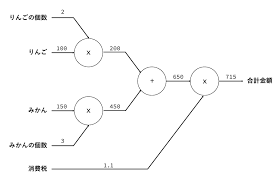

# 連鎖律

連鎖律とは合成関数の微分についての性質であり、次のように定義される。
### ある関数が合成関数で表される場合、その合成関数の微分は、合成関数を構成するそれぞれの関数の積によって表すことができる。

# レイヤの実装
## 乗算レイヤの実装

In [1]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

リンゴ二個tと消費税の実装

In [2]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", price)
print("dApple:", dapple)
print("dApple_num:", dapple_num)
print("dTax:", dtax)

price: 220.00000000000003
dApple: 2.2
dApple_num: 110.00000000000001
dTax: 200


# 加算レイヤの実装

In [3]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self,x,y):
        out = x + y
        return out
    
    def backward(self,dout):
        dx = dout * 1
        dy = dout * 1 
        return dx, dy
    

リンゴ2個とみかん3個の買い物の実装

In [4]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


# 活性化関数レイヤの実装

## ReLU レイヤ

In [5]:
class Relu:
    def __init__(self):
        self.mask = none
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self,dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

ReLUクラスは、インスタンス変数としてmaskという変数を持ち、順伝播の入力であるxの要素で、０以下の場所をTrue、それ以外をFalseとして保持する。

# Sigmoidレイヤ

シグモイド関数は{y = \frac{1}{1 + exp(-x)}}であらわされる関数
計算グラフでは以下のように
計算グラフであらわすと以下のようになる。 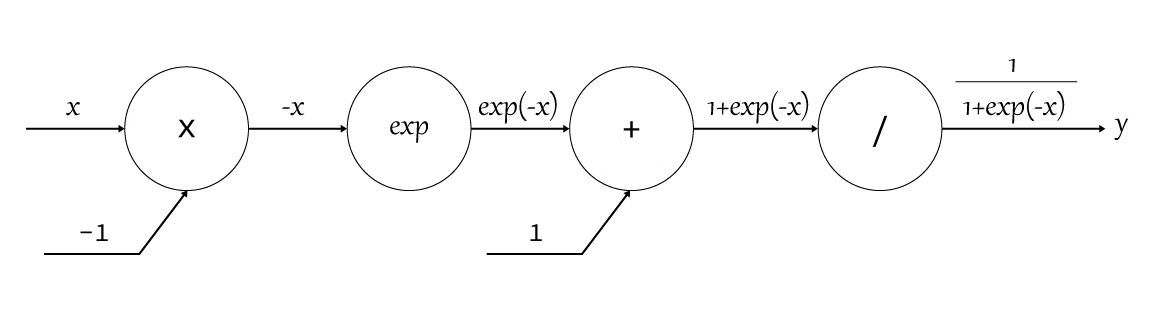 新しく、「/」ノードと「exp」ノードが出てくる。 「/」のノードはつまりはy = \frac{1}{x}
 
を計算するノード。 「exp」ノードはy = exp(x)を表す。 それを踏まえてグラフに書き表すと次のようになる。 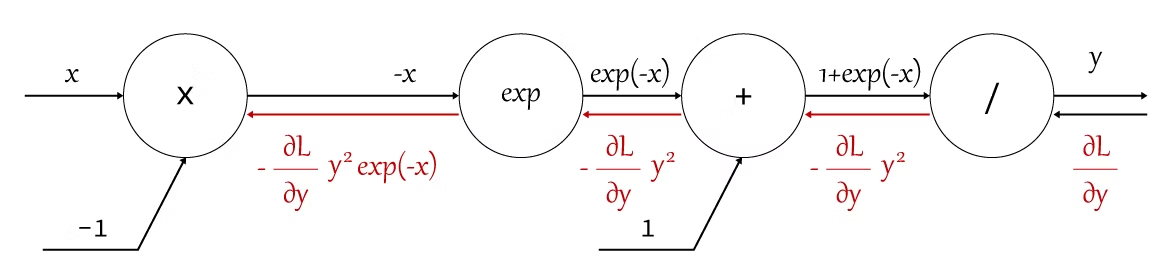  これらの複雑な計算グラフはsigmoidnとしてグループ化して計算を行うことができる 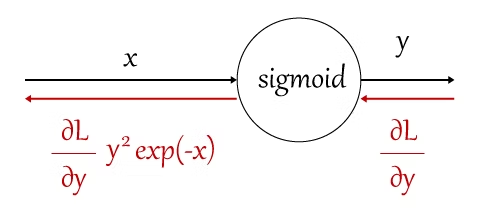

In [6]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

# Affineレイヤ

In [7]:
class Affine:# 入力信号に重みをかけてその総和とバイアスをたす処理のレイヤ実装
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None # 逆伝播処理で求めた各微分を保存するためにインスタンス変数を作成
        self.db = None # 逆伝播処理で求めた各微分を保存するためにインスタンス変数を作成

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)# 複数データ（バッチ）に対応させるには
        # バイアスの微分を前の微分の総和で求める

        return dx

逆伝播処理は、Affineレイヤの順伝播処理では掛け算と足し算を使っているので、バイアスの微分は前の微分を継承、重みと入力値の微分はそれぞれを転置して取り替え前の微分と掛け算することで求める。

# Softmax-with-Lossレイヤ
Softmax関数と交差エントロピー誤差の二つが合体したレイヤー。

In [8]:
class SoftmaxWithLoss:
    def __init__(self):
        """
        損失、softmaxの出力、教師データを入れる場所を作ります
        Attributes
        ----------
        loss : numpy.array
            損失
        y : numpy.array
            softmaxの出力
        t : numpy.array
            教師データの答え
        """
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        """
        順伝搬の計算をします

        Parameters
        ----------
        x : numpy.array
            前のレイヤーから出力した結果
        t : numpy.array
            教師データの答え
        Returns
        -------
        dx : float
            損失
        """
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        """
        逆伝播の計算をします

        Parameters
        ----------
        dout : int
            正規化の値(1)

        Returns
        -------
        dx : int
            損失から計算した差
        """
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size

        return dx

# 誤差伝播法の実装

今までに実装したレイヤを組み合わせることでニューラルネットワークを構築する。

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


# 勾配確認

誤差逆伝播法で求めた勾配の結果が数値微分で求めた勾配の結果と一致することを確認する作業のこと

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))